In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_data clean.csv")
df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [4]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])

In [5]:
df['year'] = df['album_release_date'].dt.year
df.drop(columns=['album_release_date', 'album_id', 'track_number'], inplace = True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_popularity    8582 non-null   int64  
 3   explicit            8582 non-null   bool   
 4   artist_name         8579 non-null   object 
 5   artist_popularity   8582 non-null   int64  
 6   artist_followers    8582 non-null   int64  
 7   artist_genres       5221 non-null   object 
 8   album_name          8582 non-null   object 
 9   album_total_tracks  8582 non-null   int64  
 10  album_type          8582 non-null   object 
 11  track_duration_min  8582 non-null   float64
 12  year                8582 non-null   int32  
dtypes: bool(1), float64(1), int32(1), int64(4), object(6)
memory usage: 779.5+ KB


In [7]:
df.isnull().sum()

track_id                 0
track_name               0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_name               0
album_total_tracks       0
album_type               0
track_duration_min       0
year                     0
dtype: int64

In [8]:
df = df.dropna(subset = ['artist_name'])

In [9]:
df['artist_genres'] = df['artist_genres'].fillna('Unknown')

In [10]:
df.duplicated().sum()

0

In [11]:
df['track_popularity'].describe()

count    8579.000000
mean       52.355519
std        23.818027
min         0.000000
25%        39.000000
50%        58.000000
75%        71.000000
max        99.000000
Name: track_popularity, dtype: float64

# Top 5 most popular Tracks by their Artist

In [12]:
top_track_popular_artists = (
    df.groupby('artist_name')['track_popularity']
      .sum()
      .reset_index()
      .sort_values(by='track_popularity', ascending=False)
      .head(5)
)

top_track_popular_artists

,artist_name,track_popularity
2121,Taylor Swift,19456
2222,The Weeknd,8571
1237,Lana Del Rey,6254
145,Ariana Grande,6008
597,Drake,5535


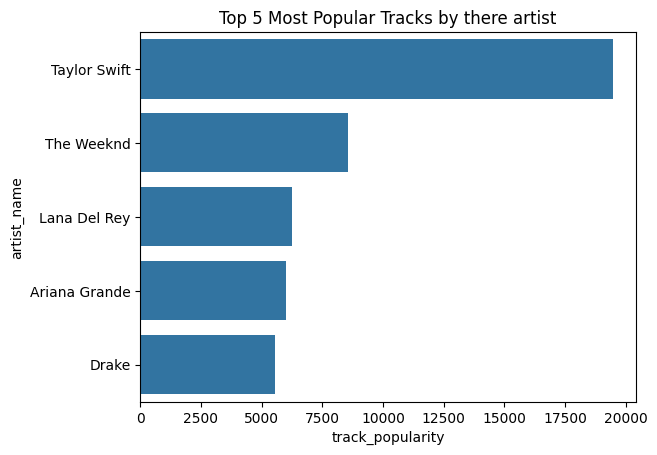

In [13]:
sns.barplot(
    data=top_track_popular_artists,
    x='track_popularity',
    y='artist_name'
)
plt.title('Top 5 Most Popular Tracks by there artist')
plt.show()

# Track Popularity Acc to Explicit

In [14]:
tr_fl = df.groupby('explicit')['track_popularity'].sum().reset_index().sort_values(by='track_popularity', ascending = False)
tr_fl

,explicit,track_popularity
0,False,325029
1,True,124129


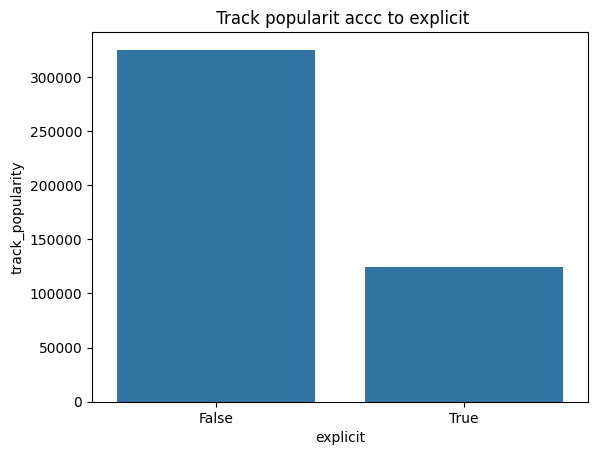

In [15]:
sns.barplot(
    data = tr_fl,
    x = 'explicit',
    y = 'track_popularity'
)
plt.title(' Track popularit accc to explicit')
plt.show()

# Top Following Artist

In [16]:
top_artist_followers = df.groupby('artist_name')['artist_followers'].sum().reset_index().sort_values(by='artist_followers',ascending = False).head()

In [17]:
top_artist_followers

,artist_name,artist_followers
2121,Taylor Swift,47122548194
2222,The Weeknd,15926749601
145,Ariana Grande,10094631410
597,Drake,8657169299
260,Billie Eilish,7241424977


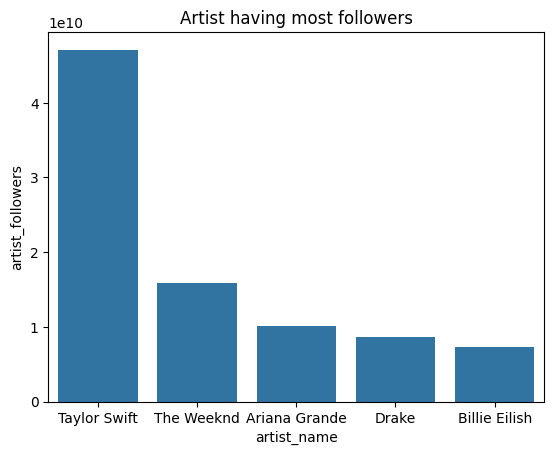

In [18]:
sns.barplot(data = top_artist_followers,
            x = 'artist_name',
            y = 'artist_followers')
plt.title('Artist having most followers')
plt.show()

# Top artist Acc to artist_popularity

In [19]:
top_populat_artist = df.groupby('artist_name')['artist_popularity'].sum().reset_index().sort_values(by = 'artist_popularity', ascending = False).head()

In [20]:
top_populat_artist

,artist_name,artist_popularity
2121,Taylor Swift,32400
2222,The Weeknd,13159
1237,Lana Del Rey,8712
145,Ariana Grande,8460
597,Drake,7980


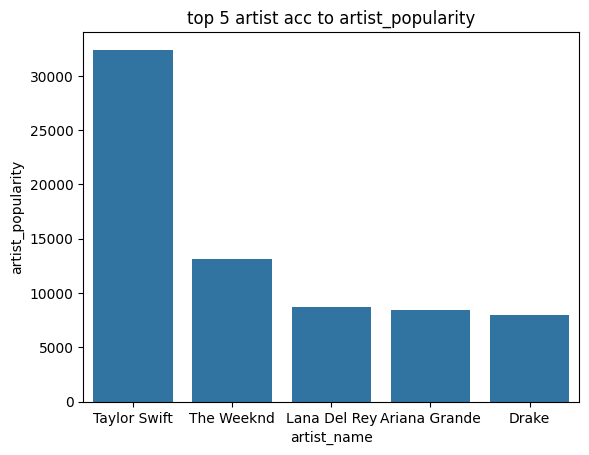

In [21]:
sns.barplot(data = top_populat_artist,
            x = 'artist_name',
            y = 'artist_popularity')
plt.title('top 5 artist acc to artist_popularity')
plt.show()

In [22]:
df.head()

,track_id,track_name,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_name,album_total_tracks,album_type,track_duration_min,year
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),0,True,Diplo,77,2812821,moombahton,"d00mscrvll, Vol. 1",9,album,1.55,2025
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",OMG!,1,single,3.07,2025
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,4,True,Riff Raff,48,193302,Unknown,Hard 2 Find,1,single,2.55,2025
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),30,True,Diplo,77,2813710,moombahton,"d00mscrvll, Vol. 1",9,album,1.69,2025
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,0,True,Rumelis,48,8682,dark r&b,come closer / ride me like a harley,2,single,2.39,2025


# Artist_genres and Track_popularity

In [23]:
df['artist_genres'] = df['artist_genres'].str.split(', ')
df = df.explode('artist_genres').reset_index(drop = True)
df['artist_genres'] = df['artist_genres'].astype('category')
top_popular_genre = (df.groupby('artist_genres', observed=True)['track_popularity'].sum().reset_index().sort_values(by = 'track_popularity', ascending = False).head(8))
top_popular_genre

,artist_genres,track_popularity
1,Unknown,169546
313,pop,56608
102,country,39530
210,hip hop,25445
220,indie,23108
161,folk,19950
344,rap,18835
356,rock,16493


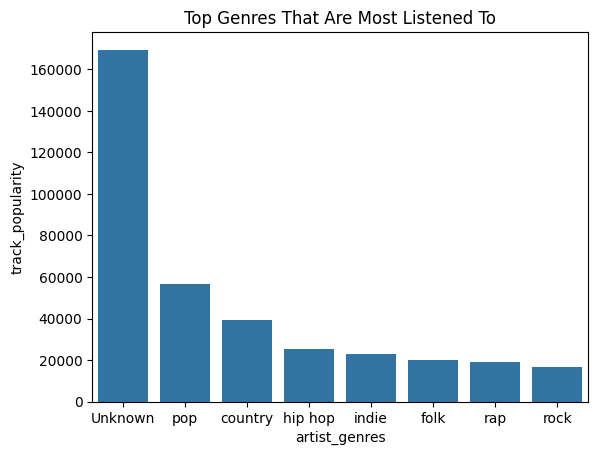

In [24]:
top_popular_genre['artist_genres'] = top_popular_genre['artist_genres'].astype(str)
sns.barplot(data = top_popular_genre,
            x = 'artist_genres',
            y = 'track_popularity')
plt.title("Top Genres That Are Most Listened To")
plt.show()

# NUmber of song per Year

In [25]:
bins = pd.cut(df['year'], bins=10, retbins=True)[1]
labels = [f'{int(bins[i])} - {int(bins[i+1])}' for i in range(len(bins)-1)]
song_per_year_range = (
    pd.cut(
        df['year'],
        bins=bins,
        labels=labels,
        include_lowest=True
    )
    .value_counts()
    .sort_index()
)

song_per_year_range


year
1951 - 1959      19
1959 - 1966      42
1966 - 1973     194
1973 - 1981     140
1981 - 1988     166
1988 - 1995     568
1995 - 2003     984
2003 - 2010    1328
2010 - 2017    3912
2017 - 2025    6832
Name: count, dtype: int64

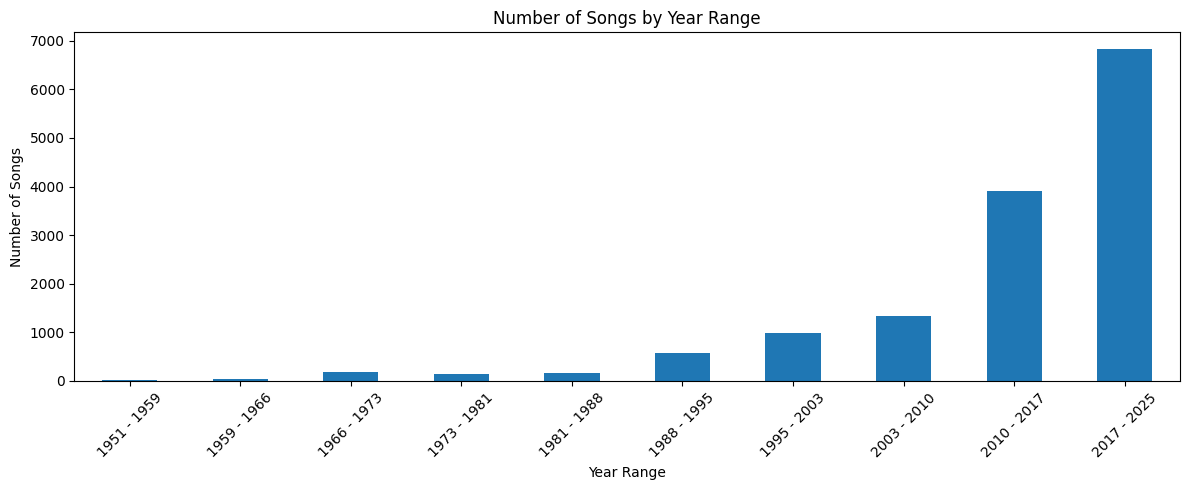

In [26]:
plt.figure(figsize=(12, 5))
song_per_year_range.plot(kind='bar')
plt.title("Number of Songs by Year Range")
plt.xlabel("Year Range")
plt.ylabel("Number of Songs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Popular Song per Year Range

In [27]:
bins = pd.cut(df['year'], bins = 10, retbins = True)[1]
labels = [f'{int(bins[i])} - {int(bins[i+1])}' for i in range(len(bins)-1)]
years_range_temp = (pd.cut(df['year'], bins = bins, labels = labels, include_lowest = True))
most_pop_song_per_range = (df.assign(Year_range = years_range_temp)
                           .loc[lambda x : x.groupby('Year_range', observed = False)
                           ['track_popularity'].idxmax()]
                           [['Year_range', 'track_name', 'track_popularity']].sort_values('Year_range', ascending = False))
most_pop_song_per_range       

,Year_range,track_name,track_popularity
641,2017 - 2025,Golden,99
9536,2010 - 2017,I Wanna Be Yours,91
11908,2003 - 2010,Feel Good Inc.,89
12888,1995 - 2003,Iris,92
13056,1988 - 1995,Gangsta's Paradise,86
13780,1981 - 1988,Every Breath You Take,90
13864,1973 - 1981,The Chain - 2004 Remaster,86
14023,1966 - 1973,Have You Ever Seen The Rain,85
14133,1959 - 1966,"Paint It, Black",82
14166,1951 - 1959,Johnny B. Goode,74


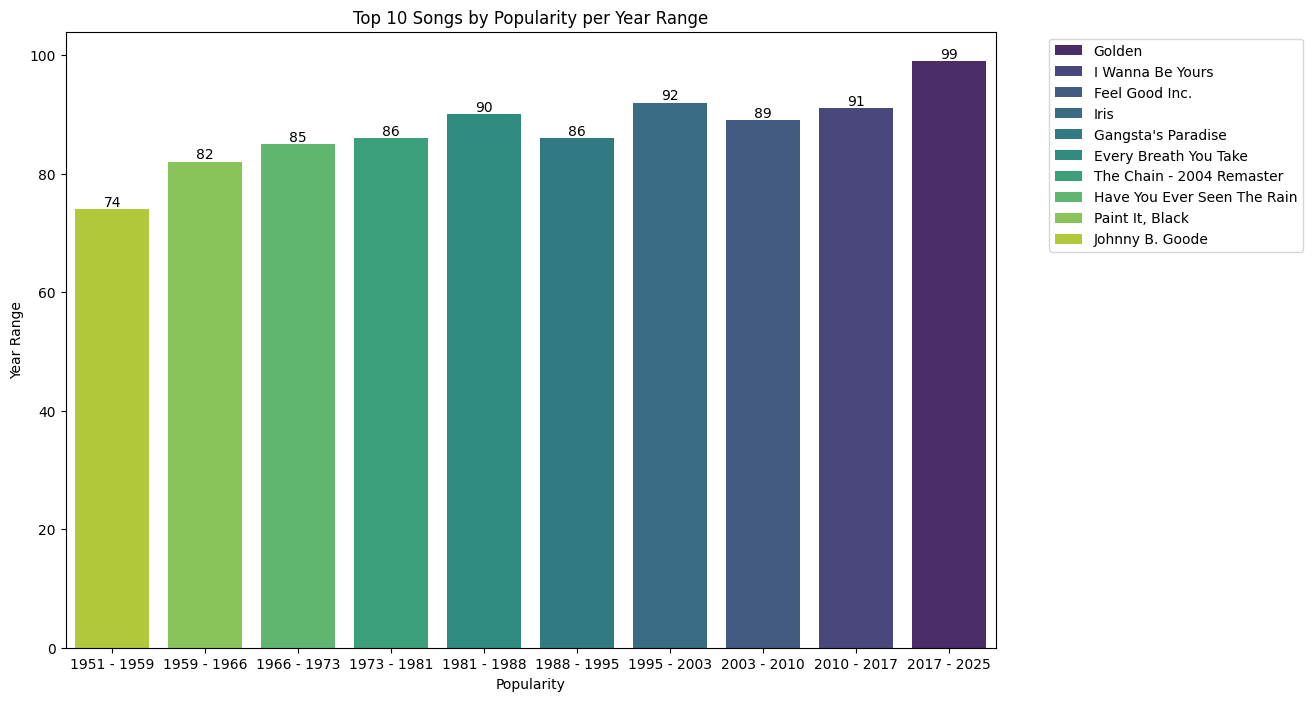

In [28]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=most_pop_song_per_range,
    x='Year_range',
    y='track_popularity',
    hue = 'track_name',
    palette='viridis'
)
plt.legend(bbox_to_anchor = (1.05,1), loc = 'upper left')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Popularity')
plt.ylabel('Year Range')
plt.title('Top 10 Songs by Popularity per Year Range')
plt.show()


# Taylor Swift and her track_popularity acc to years

In [32]:
artist = ['Taylor Swift']
year_wise_pop = (df[df['artist_name'].isin(artist)].groupby(['year', 'artist_name'])['track_popularity'].max().reset_index())
year_wise_pop

,year,artist_name,track_popularity
0,2006,Taylor Swift,52
1,2008,Taylor Swift,75
2,2010,Taylor Swift,69
3,2012,Taylor Swift,76
4,2014,Taylor Swift,83
5,2015,Taylor Swift,65
6,2017,Taylor Swift,83
7,2019,Taylor Swift,87
8,2020,Taylor Swift,86
9,2021,Taylor Swift,82


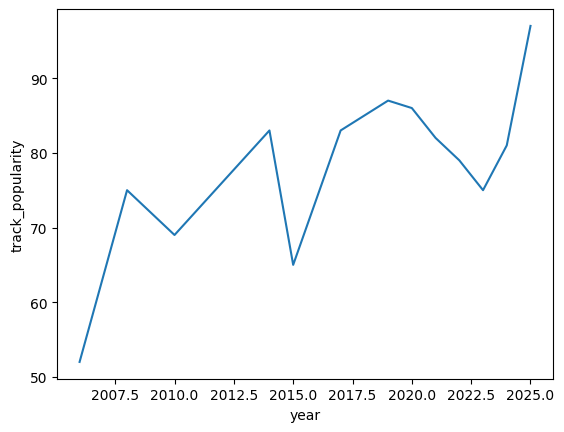

In [33]:
sns.lineplot(data = year_wise_pop,
             x = 'year',
             y = 'track_popularity'
            )
plt.show()

# corelation between track_popularity, artist_popularity and artist_follower

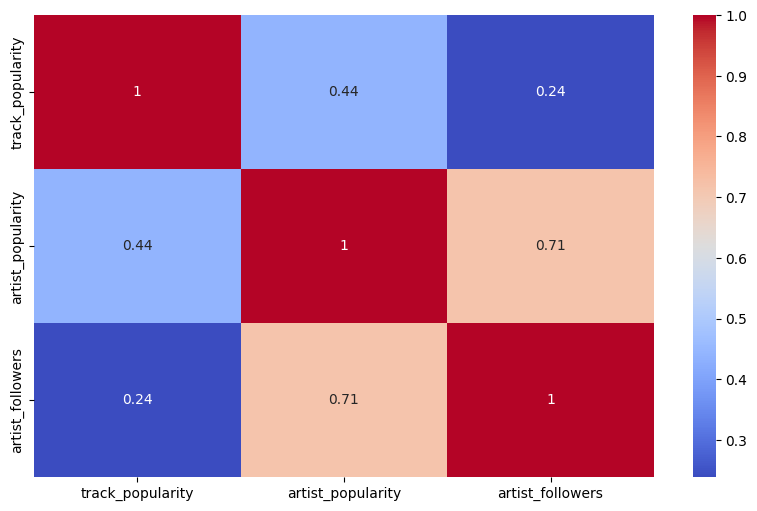

In [45]:
corr = df[['track_popularity', 'artist_popularity', 'artist_followers']].corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show() 